<a href="https://colab.research.google.com/github/isabellamwright/project_voting/blob/main/VotingEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/isabellamwright/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 123 (delta 19), reused 10 (delta 6), pack-reused 84
Receiving objects: 100% (123/123), 62.34 MiB | 7.69 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (49/49), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
voting_data = pd.read_csv("/content/project_voting/data/voting_VA.csv")
#county_data = pd.read_csv("nhgis_county_data.csv")
adjacency_data = pd.read_csv("/content/project_voting/data/county_adjacencies.csv")

In [ ]:
# Display basic information about the datasets
print("Voting Data:")
print(voting_data.head())
print(voting_data.info())

#print("\nCounty Data:")
#print(county_data.head())
#print(county_data.info())

print("\nAdjacency Data:")
print(adjacency_data.head())
print(adjacency_data.info())

Voting Data:
   Unnamed: 0  year     state state_po county_name  county_fips        office  \
0       11161  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
1       11162  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
2       11163  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
3       11164  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
4       11165  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   

        candidate       party  candidatevotes  totalvotes   version   mode  
0         AL GORE    DEMOCRAT            5092       11925  20220315  TOTAL  
1  GEORGE W. BUSH  REPUBLICAN            6352       11925  20220315  TOTAL  
2     RALPH NADER       GREEN             220       11925  20220315  TOTAL  
3           OTHER       OTHER             261       11925  20220315  TOTAL  
4         AL GORE    DEMOCRAT           16255       36846  20220315  TOTAL  
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Perform some basic descriptive statistics
print("\nDescriptive Statistics - Voting Data:")
print(voting_data.describe())

#print("\nDescriptive Statistics - County Data:")
#print(county_data.describe())



Descriptive Statistics - Voting Data:
         Unnamed: 0         year   county_fips  candidatevotes     totalvotes  \
count   3736.000000  3736.000000   3736.000000     3736.000000    3736.000000   
mean   47061.027837  2012.826552  51264.579229     5878.282120   29116.353587   
std    23219.785408     7.589036    270.546458    18452.435802   58562.057257   
min    11161.000000  2000.000000  51001.000000        0.000000       0.000000   
25%    21235.750000  2004.000000  51069.000000       59.000000    6741.500000   
50%    49016.500000  2016.000000  51139.000000      899.000000   11629.000000   
75%    71036.250000  2020.000000  51550.000000     4548.250000   24520.750000   
max    71970.000000  2020.000000  51840.000000   355133.000000  601243.000000   

          version  
count      3736.0  
mean   20220315.0  
std           0.0  
min    20220315.0  
25%    20220315.0  
50%    20220315.0  
75%    20220315.0  
max    20220315.0  


In [ ]:
# Check for missing values
print("\nMissing Values - Voting Data:")
print(voting_data.isnull().sum())

#print("\nMissing Values - County Data:")
#print(county_data.isnull().sum())


Missing Values - Voting Data:
Unnamed: 0        0
year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
version           0
mode              0
dtype: int64


0 missing values - good!

In [ ]:
# Filter voting data by party
democratic_data = voting_data[voting_data['party'] == 'DEMOCRAT']
republican_data = voting_data[voting_data['party'] == 'REPUBLICAN']
green_data = voting_data[voting_data['party'] == 'GREEN']
other_data = voting_data[voting_data['party'] == 'OTHER']

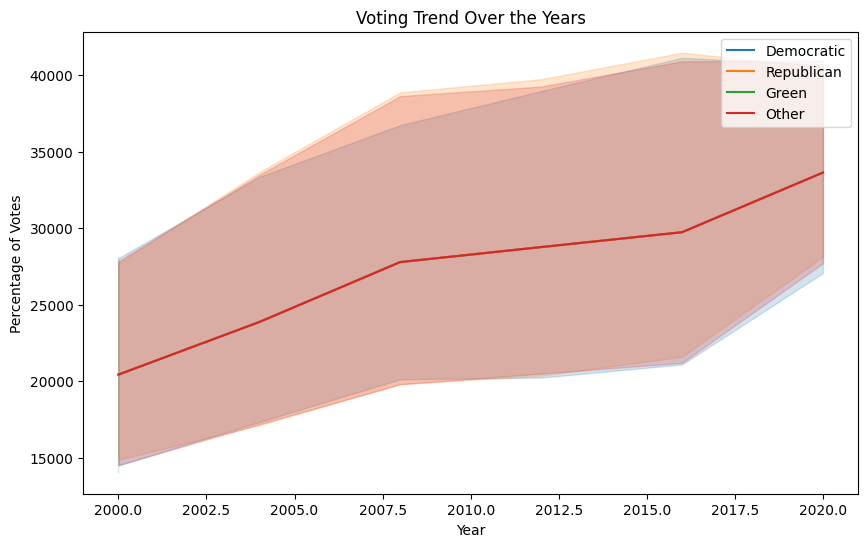

In [ ]:
# Visualize the voting trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=democratic_data, x="year", y="totalvotes", label="Democratic")
sns.lineplot(data=republican_data, x="year", y="totalvotes", label="Republican")
sns.lineplot(data=green_data, x="year", y="totalvotes", label="Green")
sns.lineplot(data=other_data, x="year", y="totalvotes", label="Other")
plt.title("Voting Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Percentage of Votes")
plt.legend()
plt.show()

In [ ]:
# Filter out non-numeric columns for correlation heatmap
numeric_columns = voting_data.select_dtypes(include=[np.number]).columns

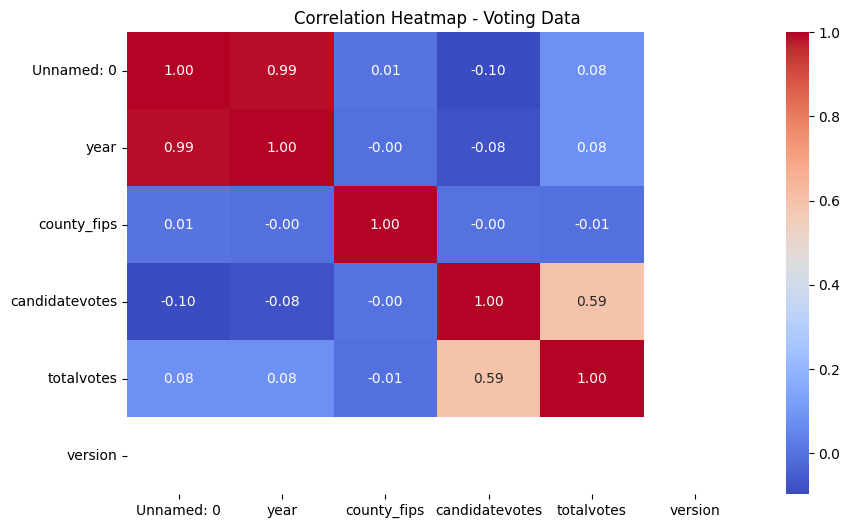

In [ ]:
# Explore correlations
plt.figure(figsize=(10, 6))
sns.heatmap(voting_data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Voting Data")
plt.show()

Total votes and candidate votes seem to have a relatively positive correlation which makes sense as they are very similar.

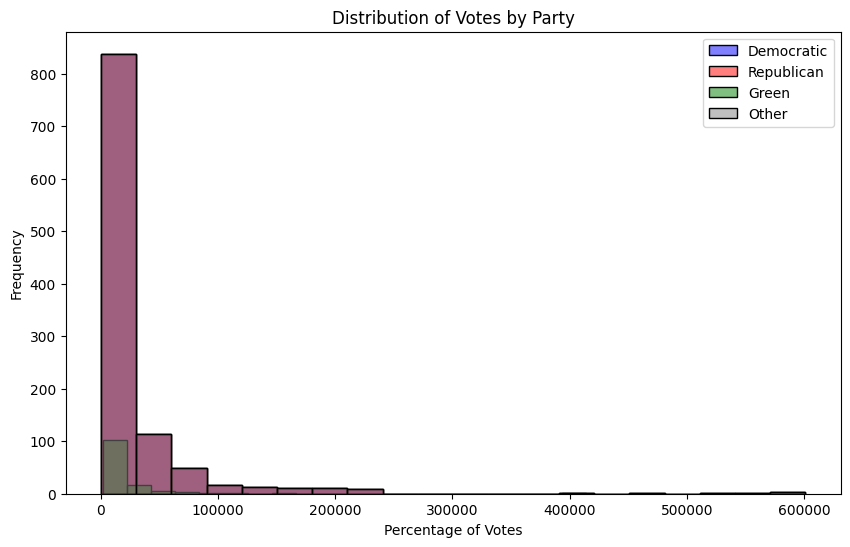

In [ ]:
# Explore distribution of votes by party
plt.figure(figsize=(10, 6))
sns.histplot(data=democratic_data, x="totalvotes", bins=20, color="blue", alpha=0.5, label="Democratic")
sns.histplot(data=republican_data, x="totalvotes", bins=20, color="red", alpha=0.5, label="Republican")
sns.histplot(data=green_data, x="totalvotes", bins=20, color="green", alpha=0.5, label="Green")
sns.histplot(data=other_data, x="totalvotes", bins=20, color="grey", alpha=0.5, label="Other")
plt.title("Distribution of Votes by Party")
plt.xlabel("Percentage of Votes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Republican seems to have the highest distribution of votes (?)

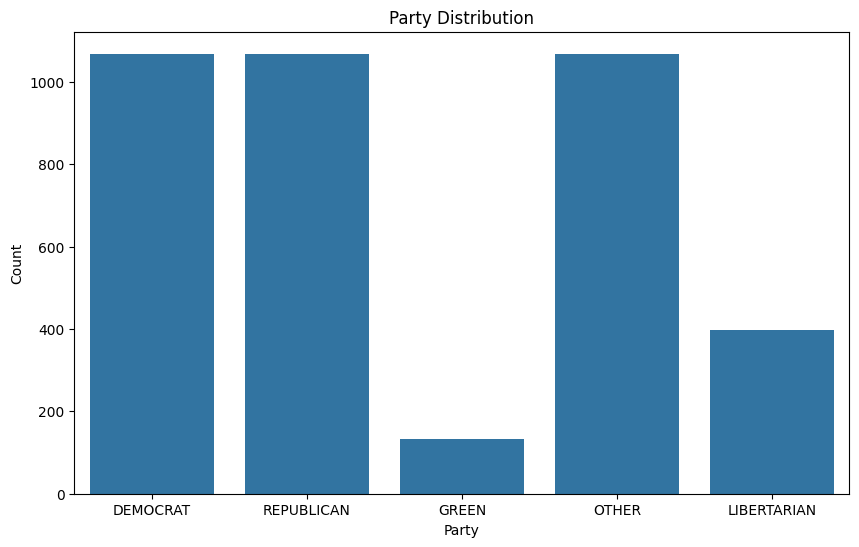

In [ ]:
# Party Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=voting_data, x='party')
plt.title("Party Distribution")
plt.xlabel("Party")
plt.ylabel("Count")
plt.show()

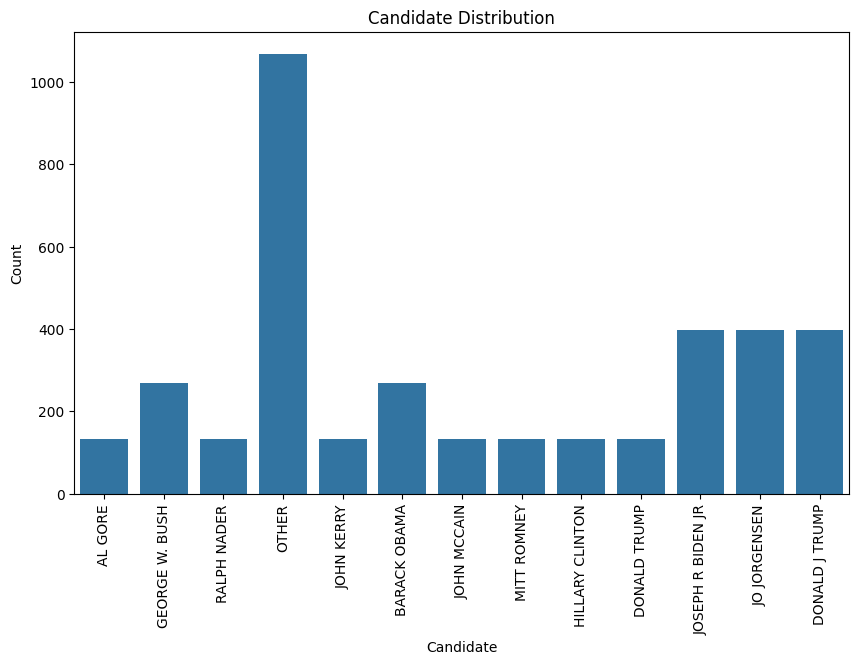

In [ ]:
# Candidate Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=voting_data, x='candidate')
plt.title("Candidate Distribution")
plt.xlabel("Candidate")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

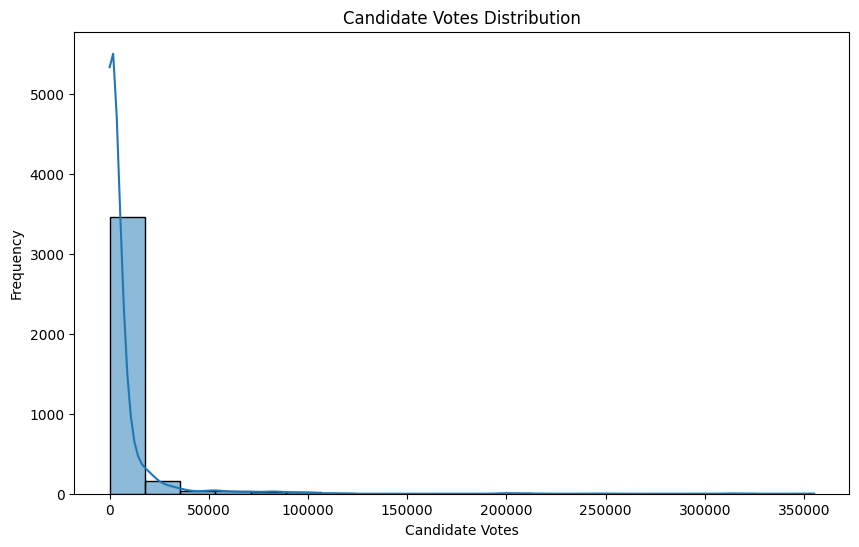

In [ ]:
# Candidate Votes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=voting_data, x='candidatevotes', bins=20, kde=True)
plt.title("Candidate Votes Distribution")
plt.xlabel("Candidate Votes")
plt.ylabel("Frequency")
plt.show()

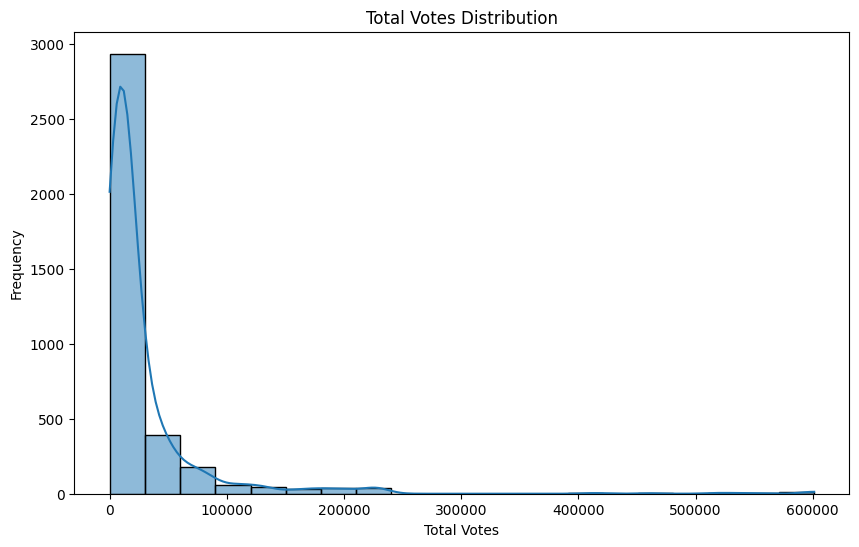

In [ ]:
# Total Votes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=voting_data, x='totalvotes', bins=20, kde=True)
plt.title("Total Votes Distribution")
plt.xlabel("Total Votes")
plt.ylabel("Frequency")
plt.show()

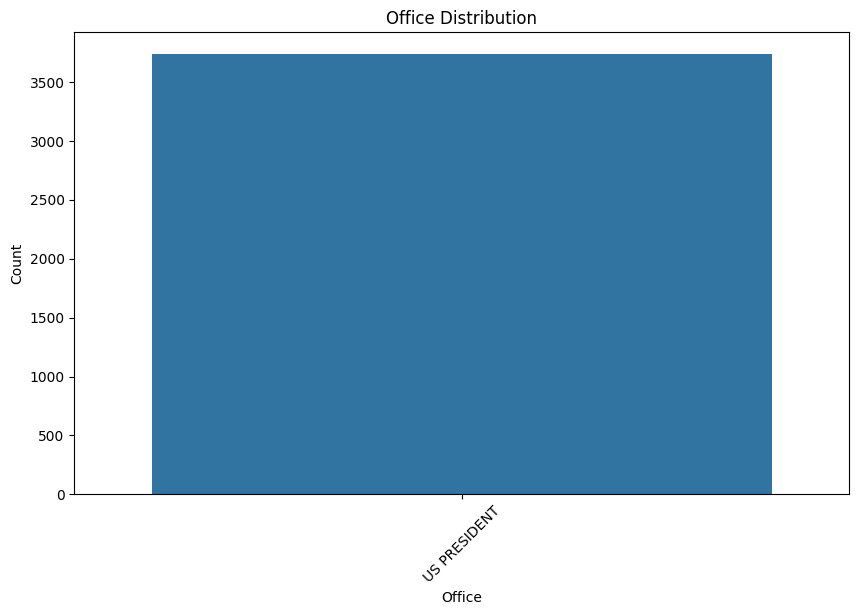

In [ ]:
# Office Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=voting_data, x='office')
plt.title("Office Distribution")
plt.xlabel("Office")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

All candidates are running for US president it seems.

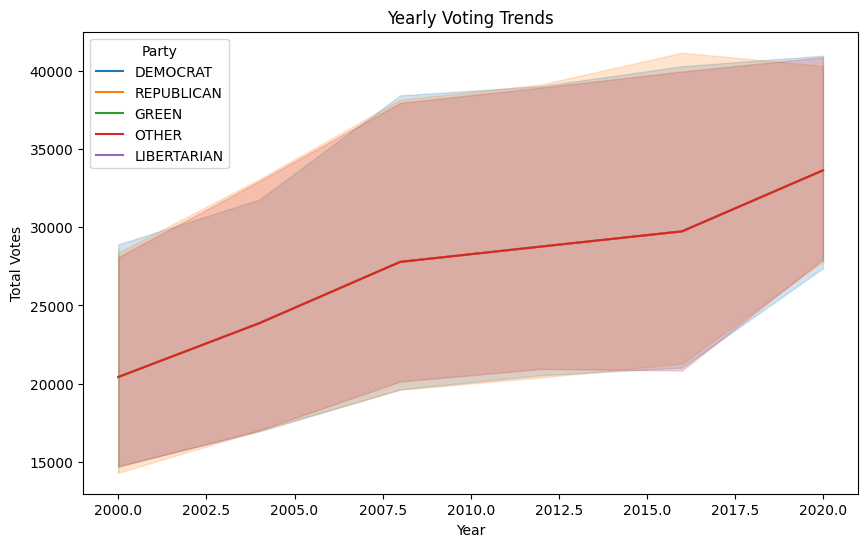

In [ ]:
# Yearly Voting Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=voting_data, x='year', y='totalvotes', hue='party')
plt.title("Yearly Voting Trends")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.legend(title='Party', loc='upper left')
plt.show()

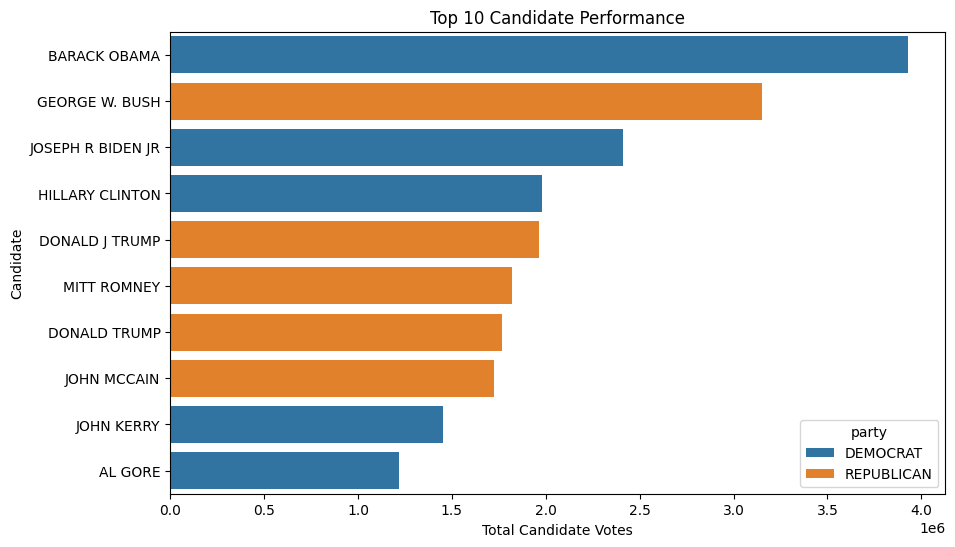

In [ ]:
# Candidate Performance
candidate_performance = voting_data.groupby(['candidate', 'party'])['candidatevotes'].sum().reset_index()
candidate_performance = candidate_performance.sort_values(by='candidatevotes', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=candidate_performance.head(10), x='candidatevotes', y='candidate', hue='party', dodge=False)
plt.title("Top 10 Candidate Performance")
plt.xlabel("Total Candidate Votes")
plt.ylabel("Candidate")
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/content/project_voting/final.csv')

# Select relevant columns
columns_of_interest = ['Income in the past 12 months at or above poverty level',
                       'Income in the past 12 months at or above poverty level: Male',
                       'Income in the past 12 months at or above poverty level: Female',
                       'Male', 'Female', 'Party']

# Subset the data
subset_df = df[columns_of_interest]



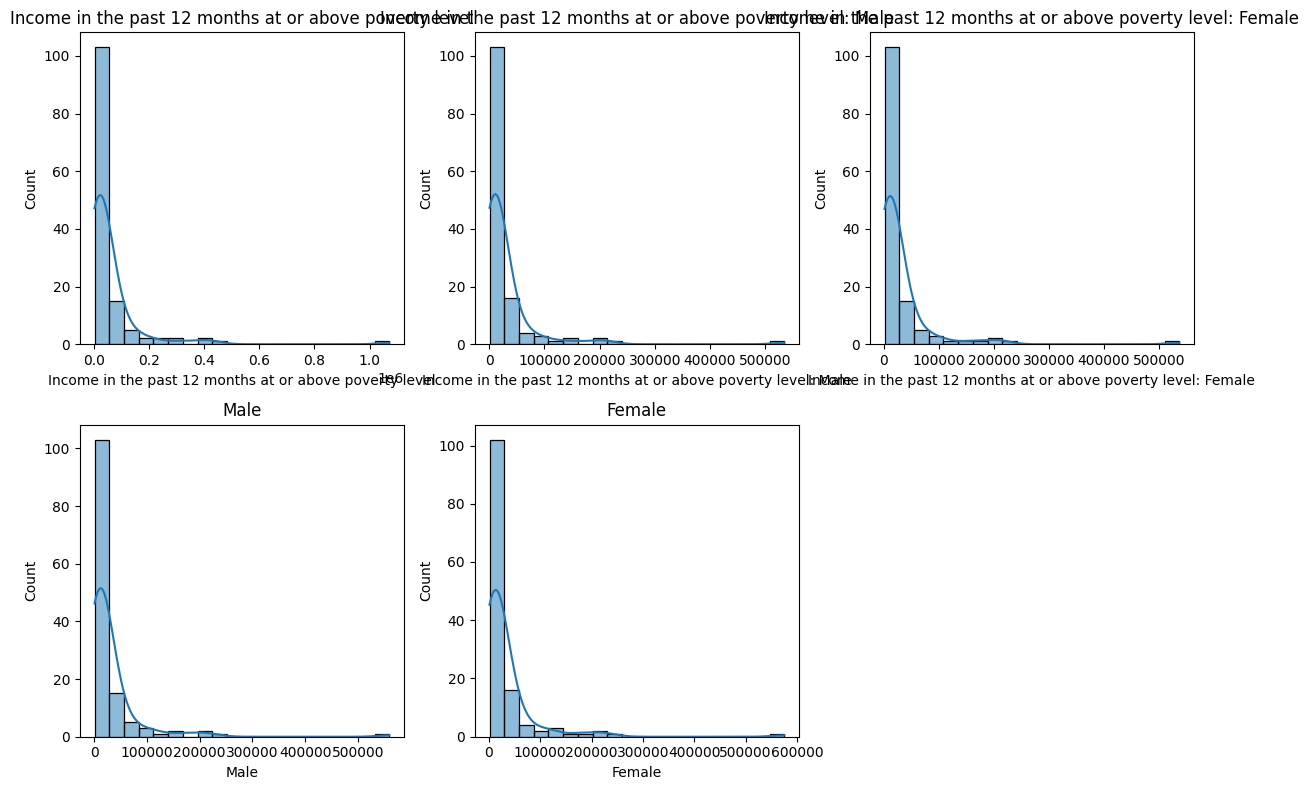

In [4]:
# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(subset_df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(subset_df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

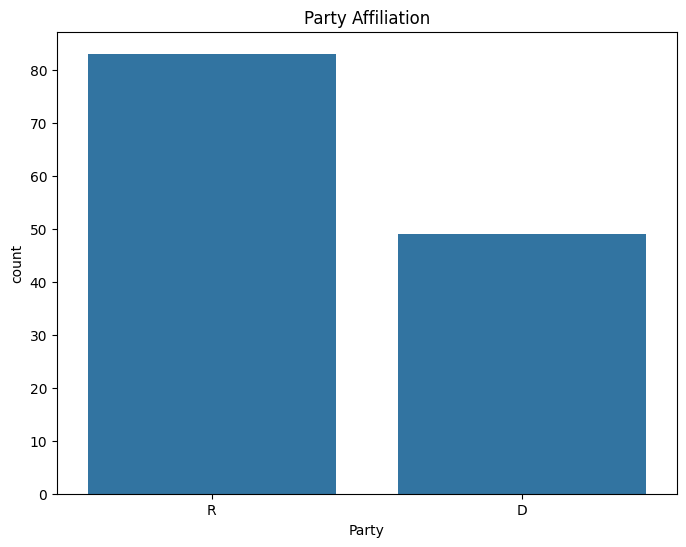

In [5]:
# Plot bar plot for party affiliation
plt.figure(figsize=(8, 6))
sns.countplot(x='Party', data=subset_df)
plt.title('Party Affiliation')
plt.show()

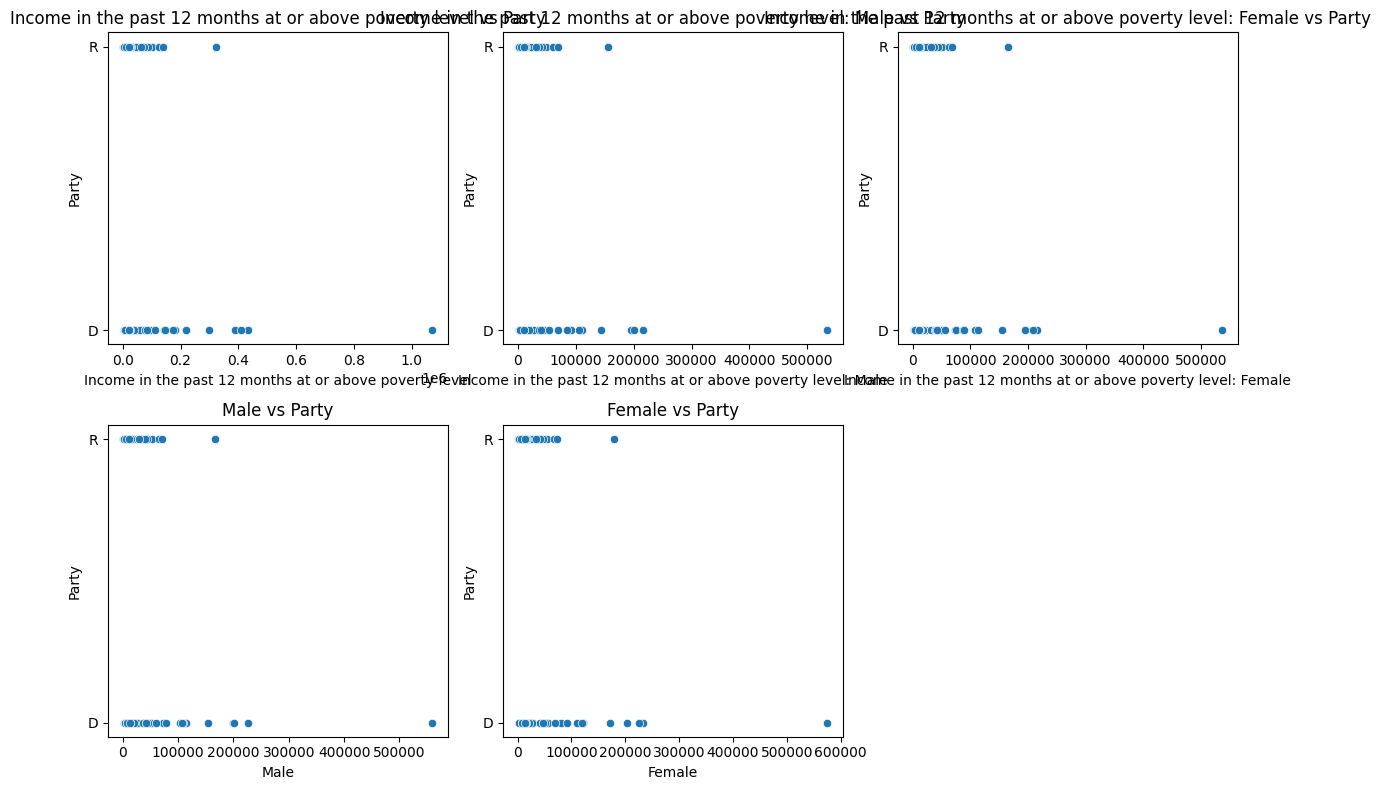

In [6]:
# Plot scatter plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(subset_df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y='Party', data=subset_df)
    plt.title(f'{col} vs Party')
plt.tight_layout()
plt.show()